### EDA (Exploratory Data Analysis)

1. load datasets

2. Clean Data (missing values,duplicates,types)

3. treat outliers

4. Univariate & Bivariate and multivariate

5. insights 

## Outlier: 

A datapoint which is significantly different from other Observations in a dataset

## How they occur:

1. Measurement Errors

2. Data entry mistakes

## Why they are important?
1. They can be errors

2. They effect the data Analysis

## How to Identify?

1. Statstical Methods
    --Inter quartile Range(IQR)
    
    --Z-Score
2. Visualisation Techniques

    --Box plots

    -->Scatter plots

    -->Histograms


### Univariate Analysis
- A method that analyzes a single variable to describe its characterstics and finding patterns and summarize the Data.
- It involves only one variable.
### Bivariate Analysis - It will give the relationship between two variables. It helps to find if there is an any correlation between the two variables and any association or any connection between two variables.
- It involves two variables 
### Multivariate Analysis - To understand how multiple factors interact and influence each other.
-It involves more than two variables
##Example-
How our age,income, and education level together influence the purchasing behaviour.

### ETL - Extract Transfer Load

### ELT

### EDA : < Dataset >

1. Load & Overview

2. Clean data (missing,duplicates,dtypes)

3. Uni,Bi, & Multi variate analysis

4. treat outliers -IQR

5. Feature Engineering

6. Key Insights


### Feature Engineering - F.E is a process of turning raw data into useful features that helps to imporve the performance of machine learning models.

# 1. Load Libraries and datasets

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
# basic Information and overview
print("Shape of the dataset:",df.shape)
print("\n Data Info: \n")
df.info()

#summary
df.describe()


Shape of the dataset: (891, 15)

 Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
# Missing values Analysis

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})

missing.sort_values(by="missing_percent",ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [79]:
# 4.Handling Missing values

# Fill the numeric missing values with mean
df['age']=df['age'].fillna(df['age'].mean())
print(df['age'].isnull().sum())

# Fill the categorical missing values with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
print(df['embarked'].isnull().sum())

# Drop 'deck' column (too many missing values)
df.drop(columns=["deck"],inplace=True)



0
0


In [80]:
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})

missing.sort_values(by="missing_percent",ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


Insight : We filled important columns and removed highly missing ones.

This keeps maximum information while making the dataset clean.

In [81]:
# Duplicates and data types check

print("Duplicate rows:",df.duplicated().sum())
# Convert some columns to 'category' type
df['class']=df['class'].astype('category')
# FIX: convert 'sex' column to category (was incorrectly set from 'age')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()

Duplicate rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


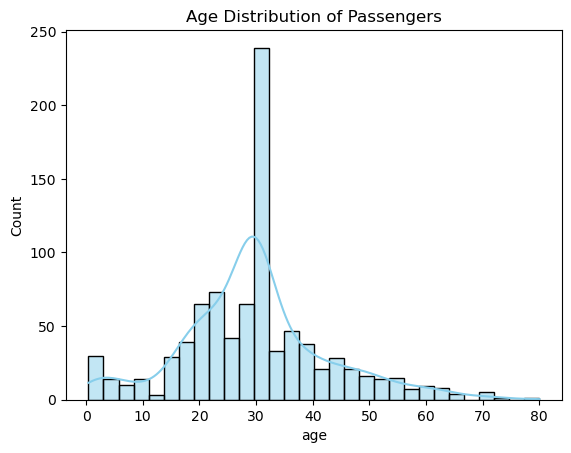

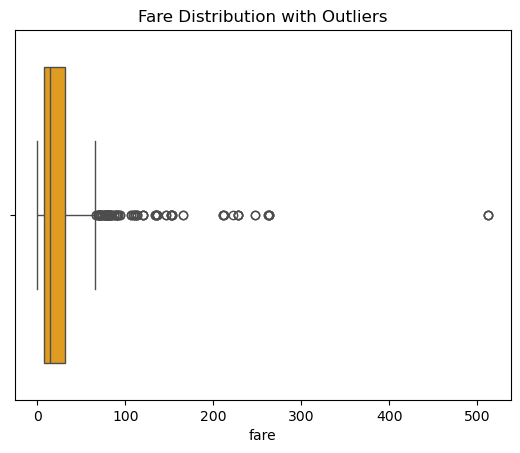

In [82]:
# 6.nivariate Analysis - Numerical Features
num_cols=df.select_dtypes('int64','float64').columns
df[num_cols].describe()

# Histogram :Age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

#Boxplot : Fare
sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare Distribution with Outliers")
plt.show()




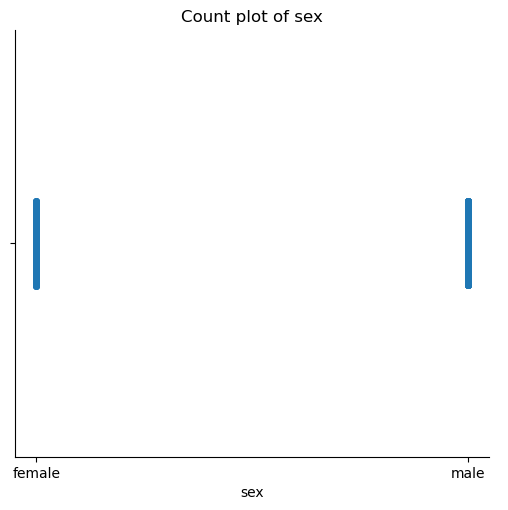

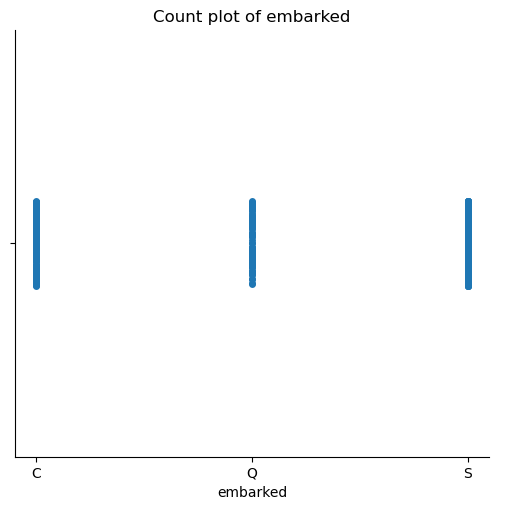

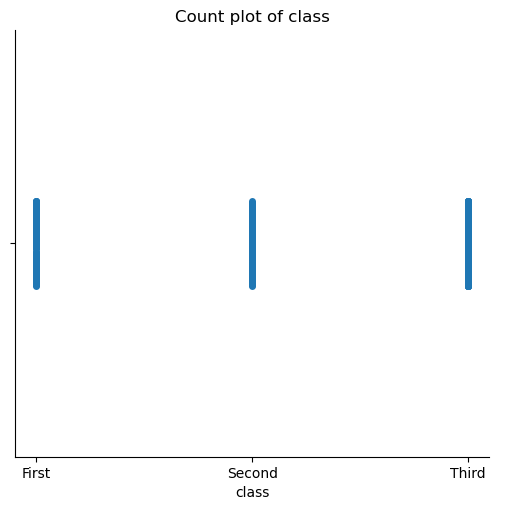

In [83]:
# Univariate Analysis - Categorical Features

cat_cols=df.select_dtypes('category').columns

for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title("Count plot of "+col)
    plt.show()

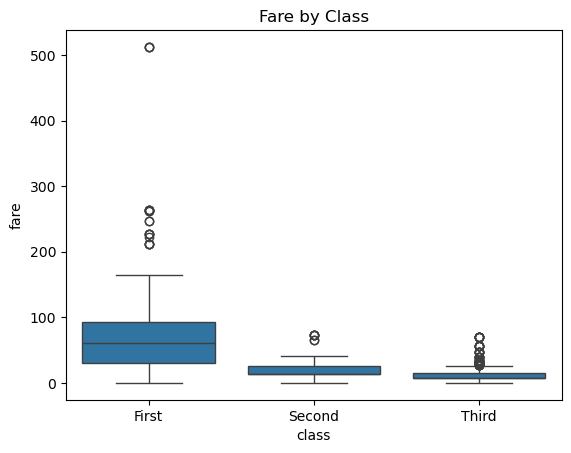

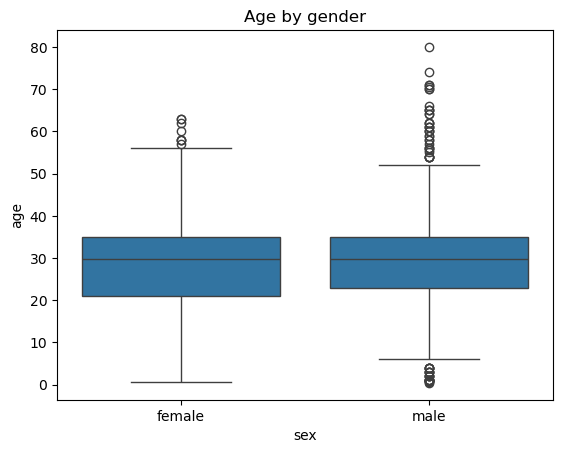

In [84]:
# Bivariate Analysis - Numerical vs Categorical

sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare by Class')
plt.show()

sns.boxplot(x='sex', y='age', data=df)
plt.title('Age by gender')
plt.show()

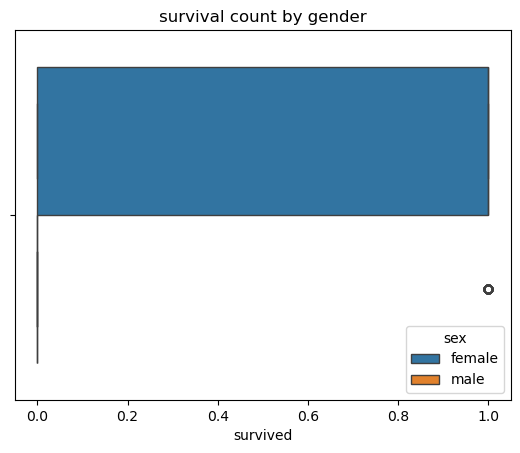

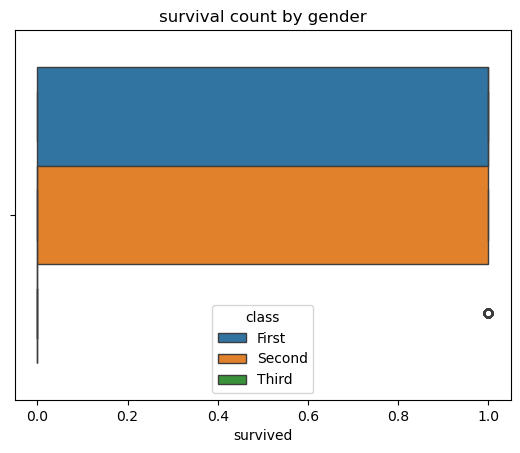

In [86]:
# Bivariate Analysis - Categorical vs Categorical

sns.boxplot(x='survived' ,hue = 'sex',data =df )
plt.title('survival count by gender')
plt.show()

sns.boxplot(x='survived' ,hue = 'class',data =df )
plt.title('survival count by gender')
plt.show()

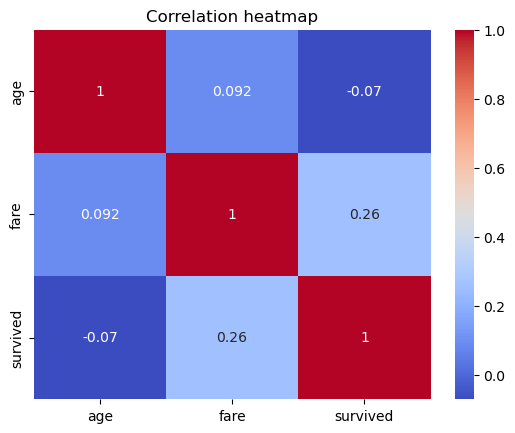

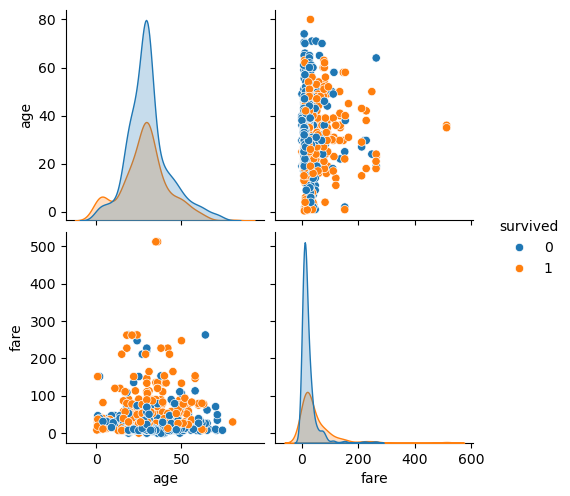

In [87]:
# Correlation and Multivariate Analysis

corr = df[['age','fare','survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

sns.pairplot(df[['age','fare','survived','class']], hue='survived')
plt.show()

Number of outliers in fare: 116


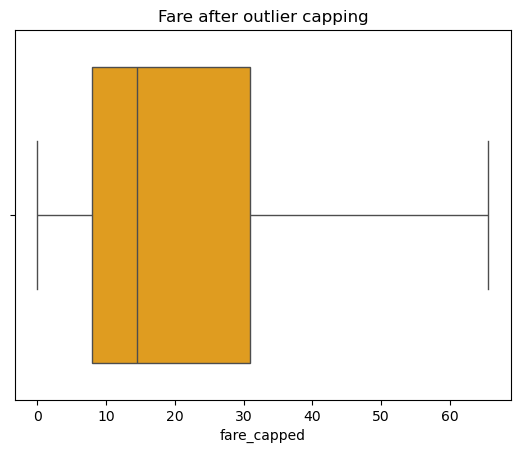

In [91]:
# Outlier detection using IQR method
Q1 = df['fare'].quantile(0.25)

Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 +1.5 * IQR

outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Number of outliers in fare:", len(outliers))

# Outlaier 
df['fare_capped'] = df['fare'].clip(lower, upper)
sns.boxplot(x=df['fare_capped'], color='orange')
plt.title('Fare after outlier capping')
plt.show()

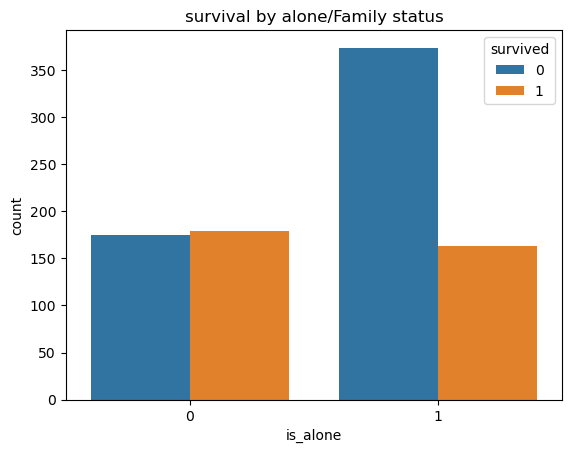

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [92]:
# Feature Engineering

# Create a new feature 

df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size'] == 1).astype(int)

sns.countplot(x='is_alone',hue= 'survived', data=df)
plt.title('survival by alone/Family status')
plt.show()

df[['family_size','is_alone','survived']].head()

In [93]:
# Explore the cleaned data

df.to_csv('titanic_cleaned.csv', index=False)
print("\n cleaned Titanic data saved to 'titanic_cleaned.csv' ")


 cleaned Titanic data saved to 'titanic_cleaned.csv' 
